In [ ]:
import sys
sys.path.append('..')
from tool import *

In [3]:
pdd=pd.read_csv('../data/model_val_all.csv')
ww=pdd[pdd['w/b-sky']=='W']
bb=pdd[pdd['w/b-sky']=='B']
print('White-sky')
print('r2:',r2_score(ww['gt']/1000,ww['pre']/1000))
print('rmse:',np.sqrt(mean_squared_error(ww['gt']/1000,ww['pre']/1000)))
print('Black-sky')
print('r2:',r2_score(bb['gt']/1000,bb['pre']/1000))
print('rmse:',np.sqrt(mean_squared_error(bb['gt']/1000,bb['pre']/1000)))

White-sky
r2: 0.9311760376968371
rmse: 0.010165926522237906
Black-sky
r2: 0.9431448464143906
rmse: 0.009010601434511127


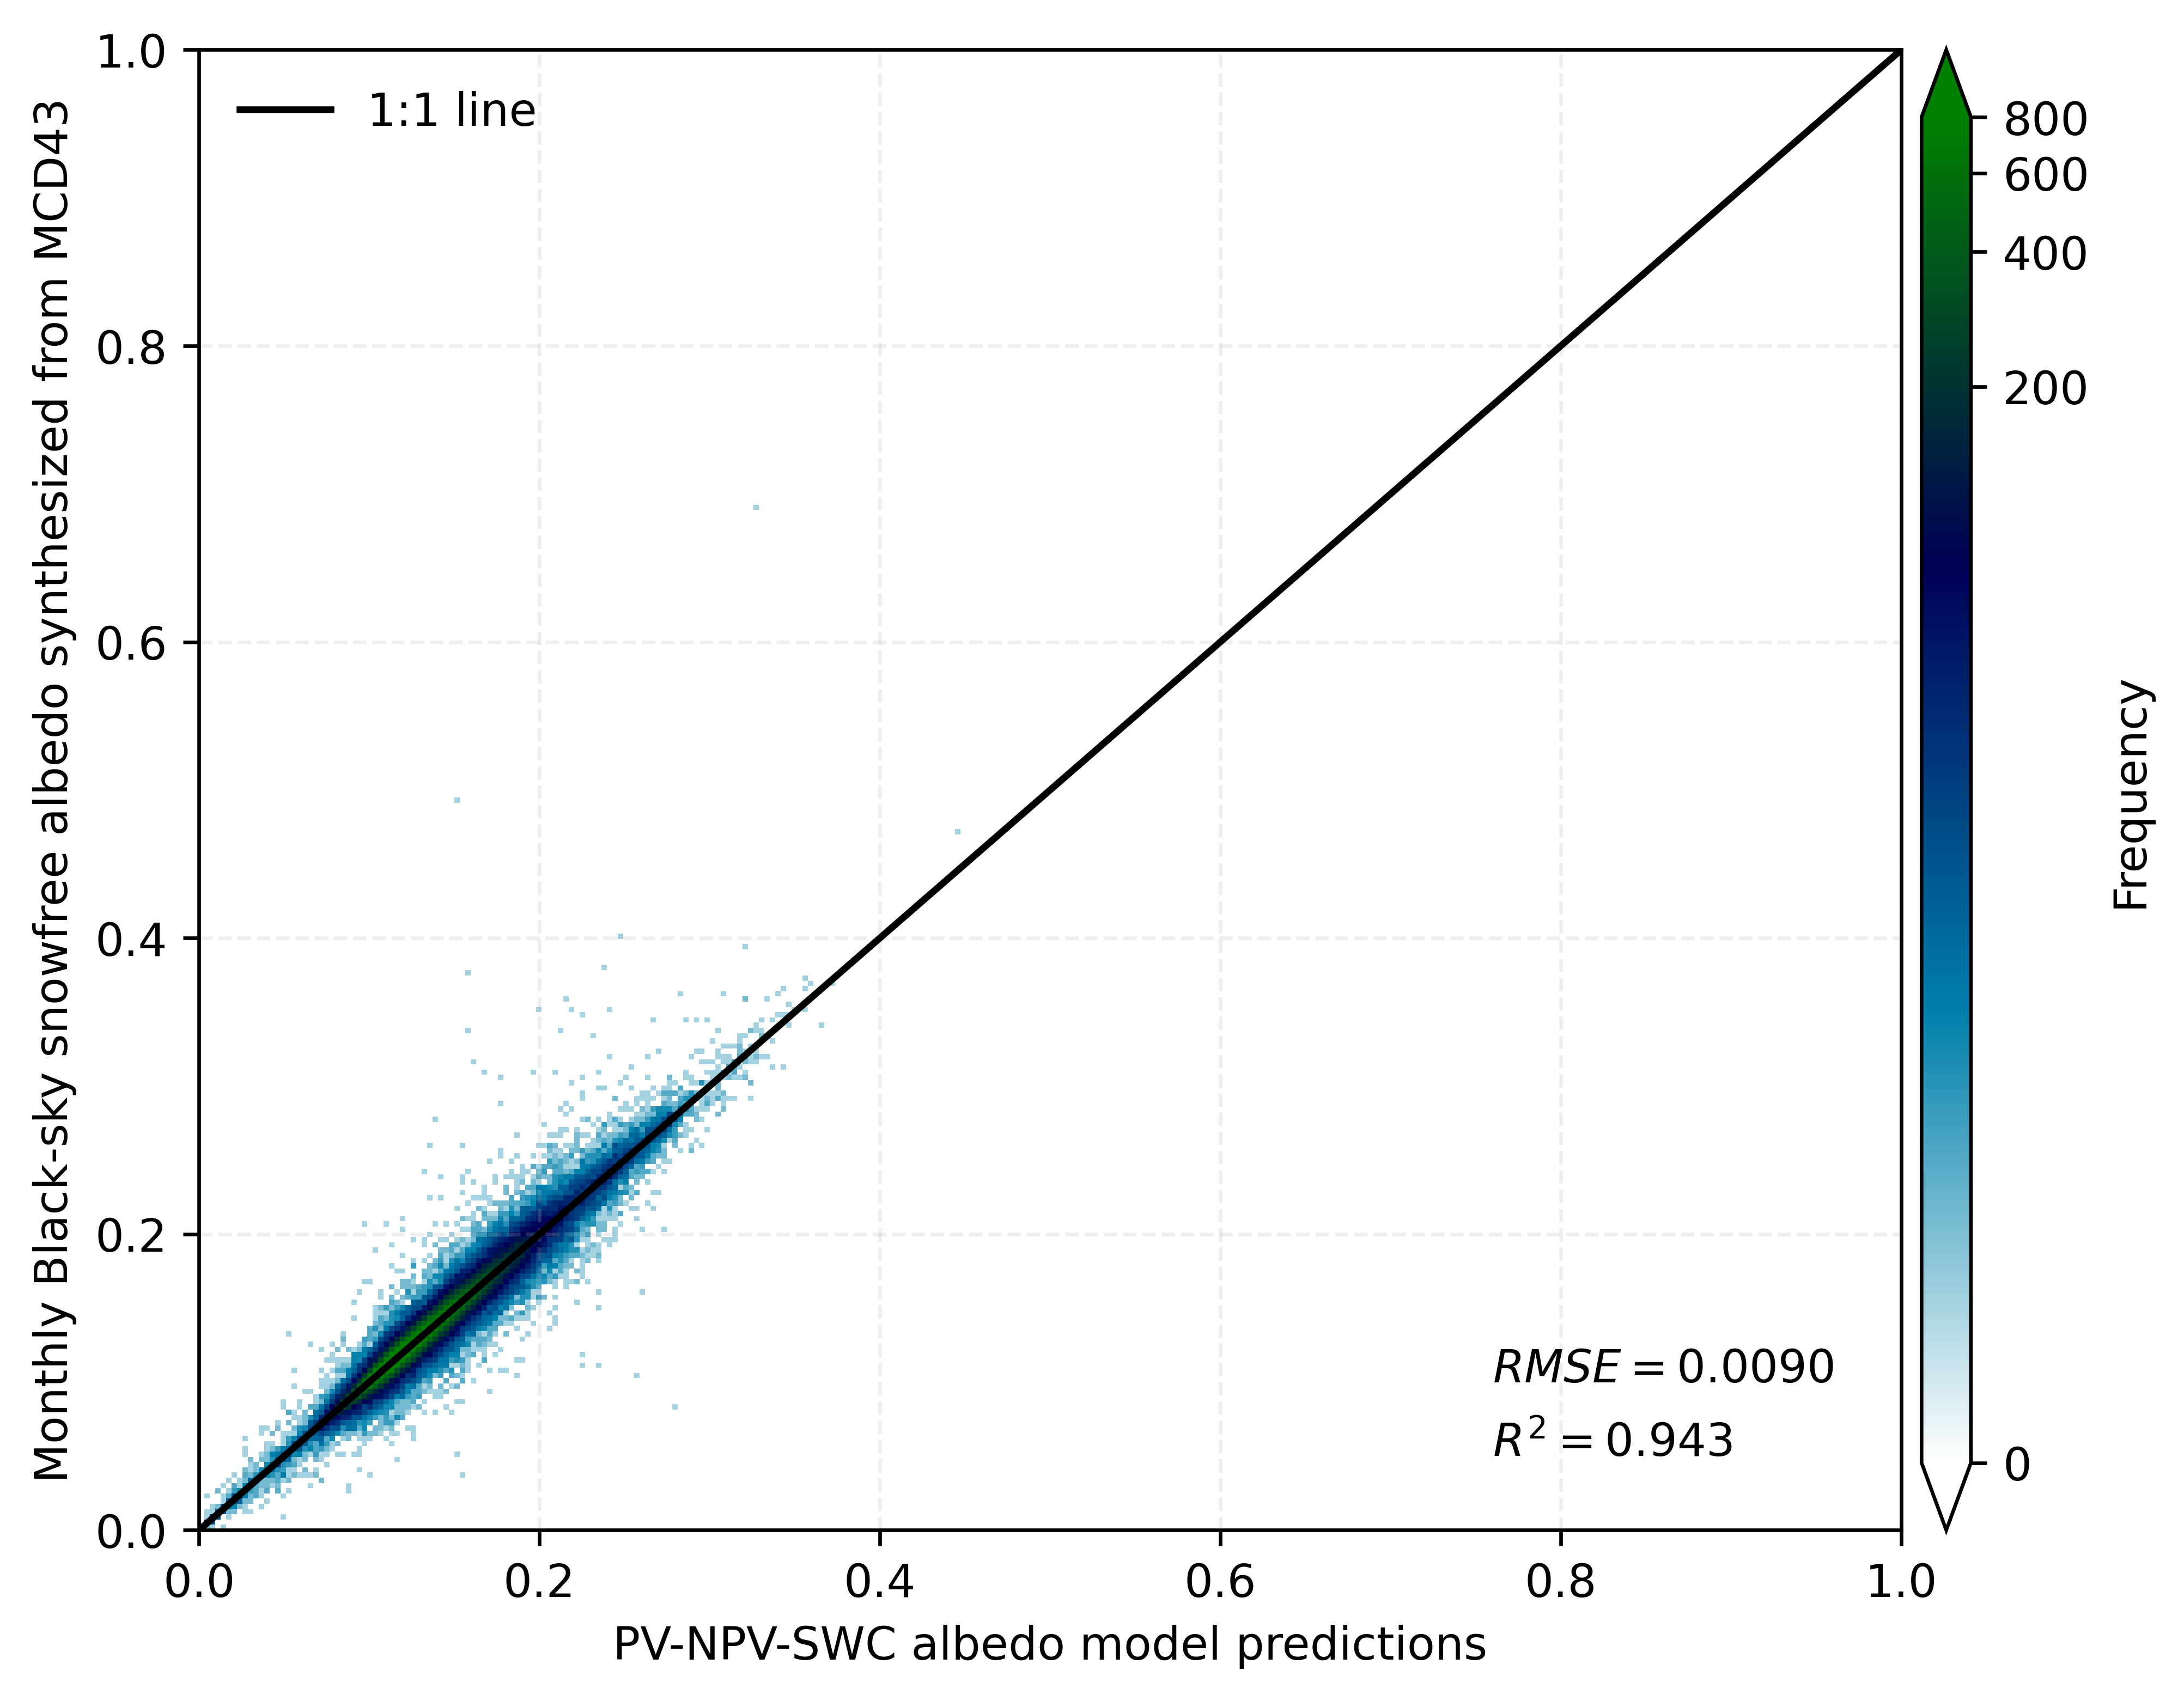

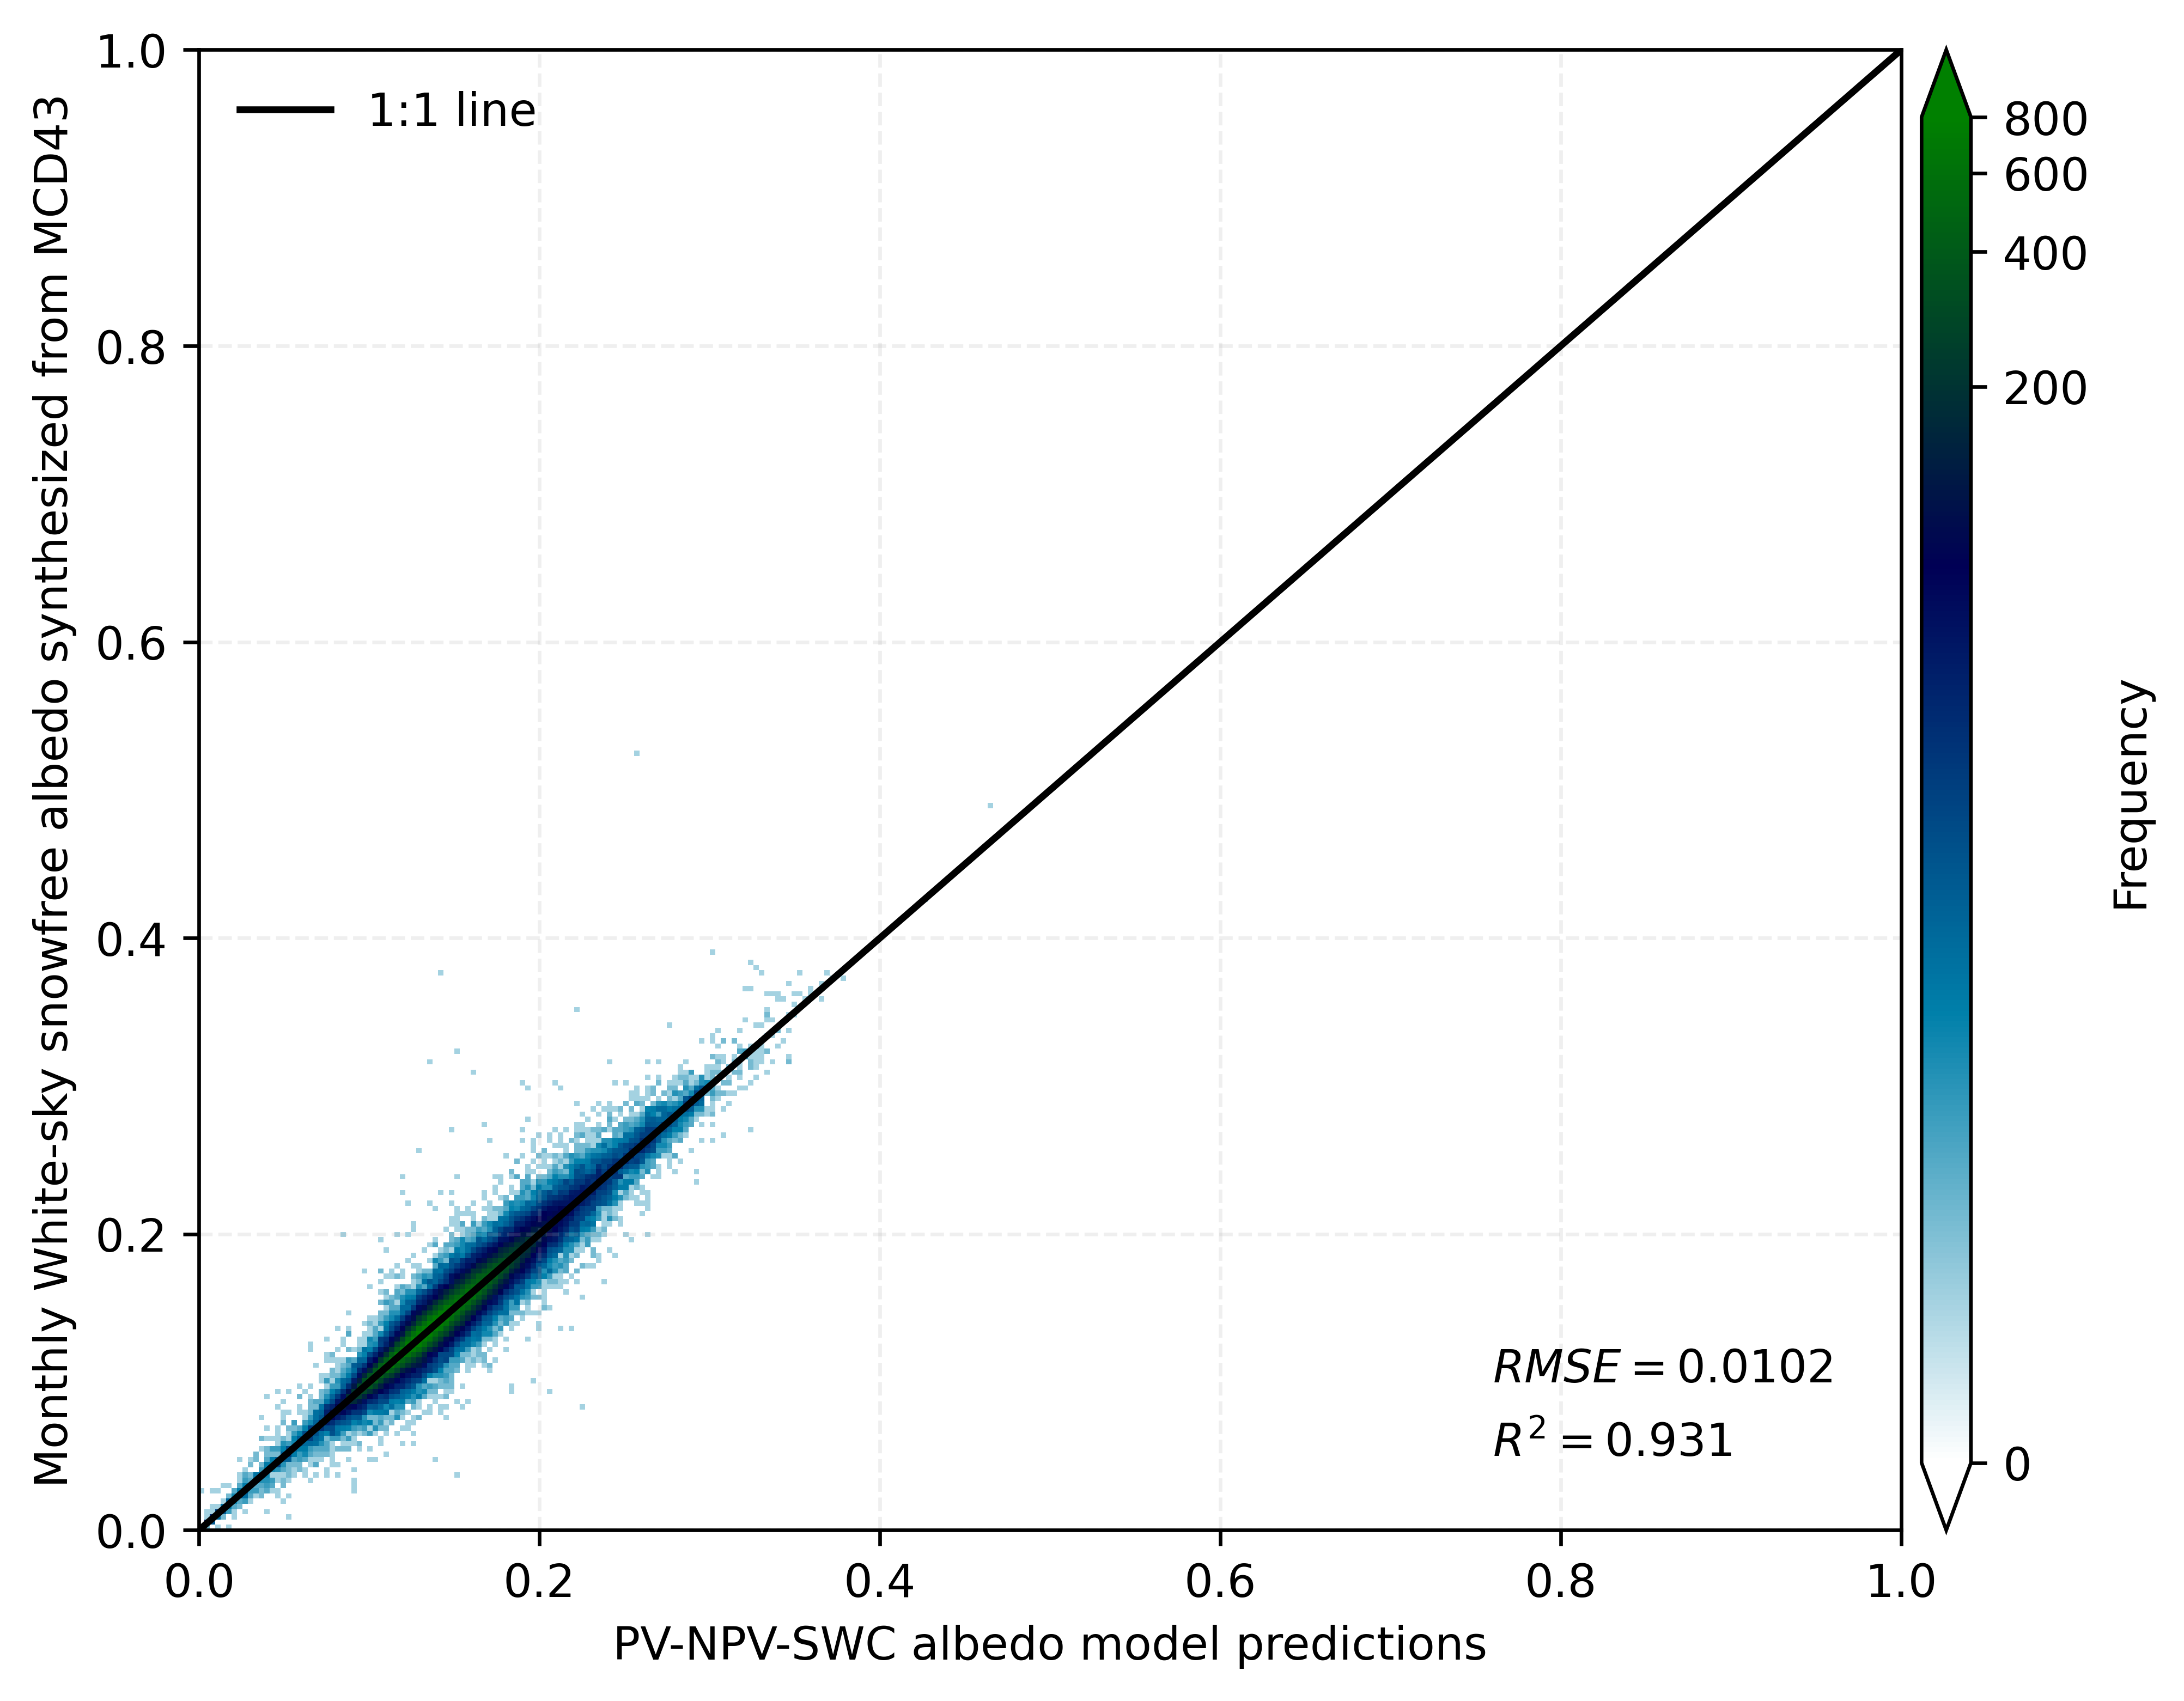

In [4]:
for wb_sky in ['B','W']:
    pdd_wb=pdd[pdd['w/b-sky']==wb_sky]
    x,y=pdd_wb['pre']/1000,pdd_wb['gt']/1000
    R2 = r2_score(x,y)
    xy = np.vstack([x, y])
    def slope(xs, ys):
        m = (((mean(xs) * mean(ys)) - mean(xs * ys)) / ((mean(xs) * mean(xs)) - mean(xs * xs)))
        b = mean(ys) - m * mean(xs)
        return m, b
    k, b = slope(x, y)
    regression_line = []
    for a in range(100000):
        regression_line.append((k * a/100000) + b)
        
    MSE = mean_squared_error(y,x)  
    RMSE = np.power(MSE, 0.5)
    R2 = r2_score(y,x)
    norm = ImageNormalize(vmin=0., vmax=800, stretch=LogStretch())
    fig = plt.figure(figsize=(8, 6), dpi=600)
    ax = fig.add_subplot(1, 1, 1, projection='scatter_density')
    plt.plot([0, 1], [0, 1], 'black', lw=1.5, label='1:1 line') 
    density = ax.scatter_density(x, y, cmap='ocean_r',norm=norm)
    cbar=fig.colorbar(density, shrink=1, orientation='vertical', extend='both', pad=0.01, aspect=30, label='Frequency')
    cbar.ax.yaxis.set_major_locator(MultipleLocator(200))
    ax.grid(True, linestyle='--', alpha=0.2)
    plt.annotate('$R^2=%.3f$' % R2,(0.76,0.05))
    plt.annotate('$RMSE=%.4f$' % RMSE,(0.76,0.1))
    if wb_sky=='W':
        zzzz='White'
    else:
        zzzz='Black'
    plt.xlabel(f'PV-NPV-SWC albedo model predictions',fontsize=10)
    plt.ylabel(f'Monthly {zzzz}-sky snowfree albedo synthesized from MCD43',fontsize=10)
    plt.axis([0, 1, 0,1])
    ax.legend(loc='upper left', frameon = False)
    plt.savefig(f'../figure/albedomodel_{wb_sky}_val.pdf',dpi=600)
    plt.savefig(f'../figure/albedomodel_{wb_sky}_val.png',dpi=600)
    plt.show()